
# Basic Overview
The objective is to build go through data, validate it and test out PCA techniques on the same.

Comments/criticisms/appreciations are greatly accepted and appreciated. Do not be shy and send me an email at babinu@gmail.com !

Source of data : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [55]:
import pandas as pd
import numpy as np

In [56]:
import sys
sys.path.append('../common_routines/')
import numpy as np
from relevant_functions import\
    fit_pipeline_and_cross_validate, \
    get_validated_transformed_data, \
    get_cross_validation_score


### Master plan
Since, we already have an infrastructure built for handling pipelines(as part of our lasso analysis), let us plan out what is to be done here.

The first step would be to create a pipeline, with the following steps :

1. Impute missing values.
2. Do PCA on after imputation.
3. Fit the model on PCA components.

and then do cross validation using the same. If things look favorable, we can do an out of sample analysis as well.


#### First set up, set up data properly

In [57]:
complete_train_data = get_validated_transformed_data("../input/train.csv")

In [58]:
complete_train_data_one_hot = pd.get_dummies(complete_train_data)
train_data_one_hot = complete_train_data_one_hot[:(1460 - 365)].copy()
test_data_one_hot = complete_train_data_one_hot[(1460 - 365):].copy()

#### Set up pipelines appropriately

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
def get_pca_pipeline(num_pca_components=5):
    pca = PCA(n_components=num_pca_components, random_state=0)
    my_pipe = Pipeline([('missing', Imputer(strategy='mean')),
                        ('pca', pca),
                        ('model', linear_model.LinearRegression())
                        ])
    return my_pipe

In [60]:
predictor_cols = [col for col in train_data_one_hot.columns if col not in ['SalePrice']]


In [61]:
from sklearn import linear_model
NUM_PCA_COMPONENTS = 50
(my_pipe, cross_validation_score) = fit_pipeline_and_cross_validate(
    get_pca_pipeline(num_pca_components=NUM_PCA_COMPONENTS), 
    train_data_one_hot, predictor_cols)
print("Cross validation score is {0}".format(cross_validation_score))

Cross validation score is 0.15891440112163138


#### Plot a figure with the cross validation scores and number of principal components used

In [62]:
import pandas as pd
NUM_POINTS = 70
num_pca_comps_cross_val_score_df = pd.DataFrame(np.arange(1,NUM_POINTS+1), columns=['num_pca_components'])

In [63]:
num_pca_comps_cross_val_score_df['cross_val_score'] = \
    num_pca_comps_cross_val_score_df['num_pca_components'].apply(
        lambda x : get_cross_validation_score(
            get_pca_pipeline(num_pca_components=x), train_data_one_hot, predictor_cols))
num_pca_comps_cross_val_score_df.index = num_pca_comps_cross_val_score_df.num_pca_components
num_pca_comps_cross_val_score_df.drop(columns=['num_pca_components'], inplace=True)

Text(0.5,1,'Cross Validation score vs Number of principal components used')

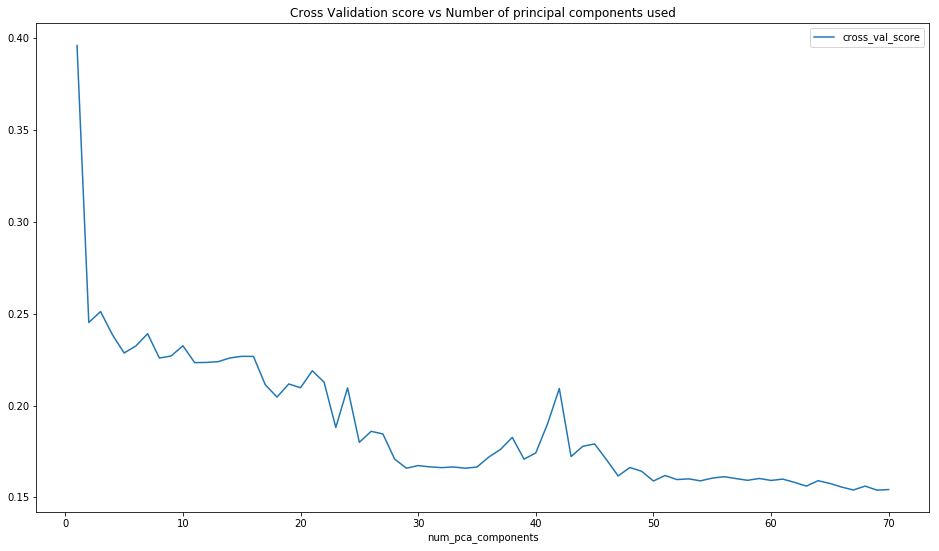

In [64]:
import matplotlib.pyplot as plt
FIGURE_LENGTH = 16
FIGURE_BREADTH = 9
fig, ax = plt.subplots(1, 1, figsize=(FIGURE_LENGTH, FIGURE_BREADTH))
num_pca_comps_cross_val_score_df.plot(ax=ax)
ax.set_title('Cross Validation score vs Number of principal components used')

Comments: As expected the score goes lower and hits a minimum of 15.43 (and that happens when the number of components = 68 ).

Since this performance is inferior to that obtained by lasso, it is not of much interest to us.

In [65]:
num_pca_comps_cross_val_score_df.min()

cross_val_score    0.153917
dtype: float64

In [66]:
num_pca_comps_cross_val_score_df.idxmin()

cross_val_score    69
dtype: int64